# Anaysis of the simulations of the vocal tract with vowels profiles
This notebook is used to analyze the results of the simulations of the vocal tract with vowel profiles. It is under construction.

In [1]:
# Imports
%load_ext autoreload
%autoreload 2
#%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import sympy as sp
import pickle

import os, sys
from IPython.display import Audio

#Direct input 
plt.rcParams['text.latex.preamble']= r"\usepackage{color}"
#Options
params = {'text.usetex' : True,
          'font.size' : 18,
          'font.family' : 'lmodern',
          'ps.usedistiller' : 'xpdf'
          }
plt.rcParams.update(params) 

p = os.path.abspath('..')
sys.path.insert(1, p)

import rpm_solver as solver
import models

In [2]:
# General functions
def mean_state(x):
    """Returns middle values of x for each frame
    (case n_proj = 1)

    Args:
        x (array): array

    Returns:
        array: middle values
    """
    return (x[:-1]+x[1:])/2

def plot_responses(filenames, log = False):
    fig = plt.figure(figsize=(12, 6))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plots = [0 for i in range(len(filenames))]

    for i, filename in enumerate(filenames):
        with open(filename, 'rb') as f:
            data = pickle.load(f)
        #input_mass_flow = mean_state(data['Inputs'][:, 0, 0])
        input_mass_flow = data['Inputs'][:, 0, 0]
        #output_mass_flow = mean_state(data['Dissipations flows'][:, -1, 0])
        output_mass_flow = data['Dissipations flows'][:, -1, 0]
        sr = data['Parameters']['fs']
        # Frequency vector
        f = np.linspace(0, sr/2, int(np.floor(len(input_mass_flow)/2)+1))
        FFT_in = np.fft.fft(input_mass_flow)[0:int(np.floor(len(input_mass_flow)/2)+1)]
        FFT_out = np.fft.fft(output_mass_flow)[0:int(np.floor(len(input_mass_flow)/2)+1)]

        #Transfer function
        H = 10*np.log10(np.abs(FFT_out)/np.abs(FFT_in))
        N_tracts = data['Parameters']['Tracts']
        plots[i] = plt.plot(f, H, label = f'sr = {sr} Hz, Ntract = {N_tracts}')
    plt.legend()
    if log:
        plt.xscale('log')
    return fig, plots


# Noise input

## vowel a

Text(0.5, 0.98, 'Transfer functions for a with 10 tracts and noise input')

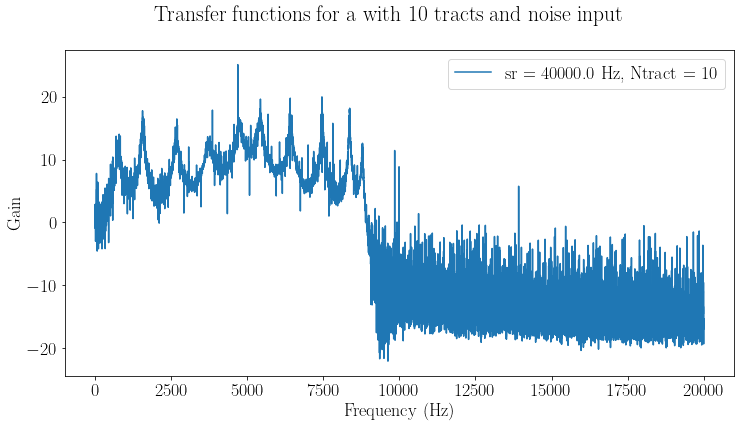

In [3]:
# Filenames of the simulation results
filenames = ['results/vowels/a/10_40k_noise.pkl']

# Transfer functions
fig1, plots1 = plot_responses(filenames, log=False)
fig1.suptitle('Transfer functions for a with 10 tracts and noise input')

In [10]:
with open(filenames[0], 'rb') as f:
    data = pickle.load(f)
    #input_mass_flow = mean_state(data['Inputs'][:, 0, 0])
    input_mass_flow = data['Inputs'][:, 0, 0]
    #output_mass_flow = mean_state(data['Dissipations flows'][:, -1, 0])
    output_mass_flow = data['Dissipations flows'][:, -1, 0]
    sr = data['Parameters']['fs']


In [12]:
Audio(mean_state(output_mass_flow), rate = sr)